In [91]:
import numpy as np
import pandas as pd

In [92]:
train = pd.read_csv("D:/桌面/titanic/train.csv")
test = pd.read_csv("D:/桌面/titanic/test.csv")
gender_submission = pd.read_csv("D:/桌面/titanic/gender_submission.csv")

In [93]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [94]:
test.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [95]:
train = pd.DataFrame(train)  
test = pd.DataFrame(test)   
full = pd.concat([train, test], ignore_index=True) #ignore_index = True
print ('合并后的数据集:',full.shape)

合并后的数据集: (1309, 12)


数据清洗

In [96]:
#查看数据信息 缺失值
print('处理前：')
print(full.isnull().sum())

# 其中数据类型列：年龄（Age）、船舱号（Cabin）里面有缺失数据：
# 1）年龄（Age）里面数据总数是 1046 条，缺失了 1309-1046=263
# 2）船票价格（Fare）里面数据总数是 1308 条，缺失了 1 条数据。

# 字符串列：
# 1）登船港口（Embarked）里面数据总数是 1307，只缺失了 2 条数据，缺失比较少
# 2）船舱号（Cabin）里面数据总数是 295，缺失了 1309-295=1014，缺失比较大。

处理前：
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64


In [97]:
#数据预处理 fillna函数
#数值类型
full['Age'] = full['Age'].fillna(full['Age'].mean())
full['Fare'] = full['Fare'].fillna(full['Fare'].mean())

print('处理后：')
print(full.isnull().sum())

处理后：
PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Cabin          1014
Embarked          2
dtype: int64


In [98]:
# 字符串类型：
# 对于登船港口（Embarked），分别计算出各个类别的数量，采用最常见的类别进行填充 value_counts()
full['Embarked'].value_counts()

Embarked
S    914
C    270
Q    123
Name: count, dtype: int64

In [99]:
full['Embarked'] = full['Embarked'].fillna('S')

In [100]:
#查看Cabin
full['Cabin'].head(20)

0      NaN
1      C85
2      NaN
3     C123
4      NaN
5      NaN
6      E46
7      NaN
8      NaN
9      NaN
10      G6
11    C103
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
Name: Cabin, dtype: object

In [101]:
#表示 unknown
full['Cabin'] = full['Cabin'].fillna('U')

数据分类

In [102]:
gender_dict = {'male':1,'female':0}

full['Sex'] = full['Sex'].map(gender_dict) #map()

In [103]:
embarkedDf = pd.DataFrame()
embarkedDf = pd.get_dummies( full['Embarked'] , prefix='Embarked' ).astype(int) #使用get_dummies进行one-hot编码,存放提取后的特征
embarkedDf.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


In [104]:
#添加one-hot编码产生的虚拟变量到full
full = pd.concat([full,embarkedDf],axis = 1)
full.drop('Embarked',axis=1,inplace=True) #inplace = True 表示直接在原始数据框上进行修改，而不是返回一个新的数据框副本

In [105]:
#用同样的错方式处理 Pclass
pclassDf = pd.DataFrame()
pclassDf = pd.get_dummies( full['Pclass'] , prefix='Pclass' ).astype(int) #使用get_dummies进行one-hot编码,存放提取后的特征
full = pd.concat([full,pclassDf],axis = 1)
full.drop('Pclass',axis=1,inplace=True)

one-hot的基本思想：将离散型特征的每一种取值都看成一种状态，若你的这一特征中有N个不相同的取值，那么我们就可以将该特征抽象成N种不同的状态，one-hot编码保证了每一个取值只会使得一种状态处于“激活态”，也就是说这N种状态中只有一个状态位值为1，其他状态位都是0。

In [106]:
#乘客头衔每个名字当中都包含了具体的称谓或者说是头衔，将
# 这部分信息提取出来后可以作为非常有用一个新变量，可以帮助我们进行预测
def getTitle(name):
    str1=name.split( ',' )[1] #Mr. Owen Harris
    str2=str1.split( '.' )[0]#Mr
    #strip() 方法用于移除字符串头尾指定的字符（默认为空格）
    str3=str2.strip()
    return str3

titleDf = pd.DataFrame()
#map函数：对Series每个数据应用自定义的函数计算
titleDf['Title'] = full['Name'].map(getTitle)

titleDf.head()

,Title
0,Mr
1,Mrs
2,Miss
3,Mrs
4,Mr


In [107]:
# 定义以下几种头衔类别：
# Officer政府官员
# Royalty王室（皇室）
# Mr已婚男士
# Mrs已婚妇女
# Miss年轻未婚女子
# Master有技能的人/教师

title_mapDict = {
                    "Capt":       "Officer",
                    "Col":        "Officer",
                    "Major":      "Officer",
                    "Jonkheer":   "Royalty",
                    "Don":        "Royalty",
                    "Sir" :       "Royalty",
                    "Dr":         "Officer",
                    "Rev":        "Officer",
                    "the Countess":"Royalty",
                    "Dona":       "Royalty",
                    "Mme":        "Mrs",
                    "Mlle":       "Miss",
                    "Ms":         "Mrs",
                    "Mr" :        "Mr",
                    "Mrs" :       "Mrs",
                    "Miss" :      "Miss",
                    "Master" :    "Master",
                    "Lady" :      "Royalty"
                    }
#map函数：对Series每个数据应用自定义的函数计算
titleDf['Title'] = titleDf['Title'].map(title_mapDict)
#使用get_dummies进行one-hot编码
titleDf = pd.get_dummies(titleDf['Title']).astype(int)


In [108]:
titleDf.head()

,Master,Miss,Mr,Mrs,Officer,Royalty
0,0,0,1,0,0,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,0,0,1,0,0
4,0,0,1,0,0,0


In [109]:
#处理Cabin和处理Name的方式类似
full['Cabin'] = full['Cabin'].map(lambda c : c[0]) #提取首字母

cabinDf = pd.get_dummies(full['Cabin'],prefix= 'Cabin').astype(int)
cabinDf.head()

,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Cabin_T,Cabin_U
0,0,0,0,0,0,0,0,0,1
1,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1


In [110]:
#家庭人数=同代直系亲属数（Parch）+不同代直系亲属数（SibSp）+乘客自己
familyDf = pd.DataFrame()
familyDf['FamilySize'] = full['Parch'] + full['SibSp'] + 1

In [111]:
familyDf[ 'Family_Single' ] = familyDf[ 'FamilySize' ].map( lambda s : 1 if s == 1 else 0 )
familyDf[ 'Family_Small' ]  = familyDf[ 'FamilySize' ].map( lambda s : 1 if 2 <= s <= 4 else 0 )
familyDf[ 'Family_Large' ]  = familyDf[ 'FamilySize' ].map( lambda s : 1 if 5 <= s else 0 )

familyDf.head()

,FamilySize,Family_Single,Family_Small,Family_Large
0,2,0,1,0
1,2,0,1,0
2,1,1,0,0
3,2,0,1,0
4,1,1,0,0


特征选择

In [112]:
full = pd.concat([full,cabinDf],axis = 1)
full = pd.concat([full,familyDf],axis = 1)
full = pd.concat([full,titleDf],axis = 1)

full.drop('Name',axis=1,inplace=True)
full.drop('Cabin',axis=1,inplace=True)
full.drop('SibSp',axis=1,inplace=True)
full.drop('Parch',axis=1,inplace=True)
full.drop('Ticket',axis=1,inplace=True)

In [113]:
full.head(3)

,PassengerId,Survived,Sex,Age,Fare,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,...,FamilySize,Family_Single,Family_Small,Family_Large,Master,Miss,Mr,Mrs,Officer,Royalty
0,1,0.0,1,22.0,7.2500,0,0,1,0,0,...,2,0,1,0,0,0,1,0,0,0
1,2,1.0,0,38.0,71.2833,1,0,0,1,0,...,2,0,1,0,0,0,0,1,0,0
2,3,1.0,0,26.0,7.9250,0,0,1,0,0,...,1,1,0,0,0,1,0,0,0,0


In [114]:
#相关系数法
corrDf = full.corr()
print(corrDf)

               PassengerId  Survived       Sex       Age      Fare  \
PassengerId       1.000000 -0.005007  0.013406  0.025731  0.031416   
Survived         -0.005007  1.000000 -0.543351 -0.070323  0.257307   
Sex               0.013406 -0.543351  1.000000  0.057397 -0.185484   
Age               0.025731 -0.070323  0.057397  1.000000  0.171521   
Fare              0.031416  0.257307 -0.185484  0.171521  1.000000   
Embarked_C        0.048101  0.168240 -0.066564  0.076179  0.286241   
Embarked_Q        0.011585  0.003650 -0.088651 -0.012718 -0.130054   
Embarked_S       -0.049836 -0.149683  0.115193 -0.059153 -0.169894   
Pclass_1          0.026495  0.285904 -0.107371  0.362587  0.599956   
Pclass_2          0.022714  0.093349 -0.028862 -0.014193 -0.121372   
Pclass_3         -0.041544 -0.322308  0.116562 -0.302093 -0.419616   
Cabin_A          -0.002831  0.022287  0.047561  0.125177  0.020094   
Cabin_B           0.015895  0.175095 -0.094453  0.113458  0.393743   
Cabin_C           0.

In [115]:
#提取特征
corrDf['Survived'].sort_values(ascending= False)

Survived         1.000000
Mrs              0.344935
Miss             0.332795
Pclass_1         0.285904
Family_Small     0.279855
Fare             0.257307
Cabin_B          0.175095
Embarked_C       0.168240
Cabin_D          0.150716
Cabin_E          0.145321
Cabin_C          0.114652
Pclass_2         0.093349
Master           0.085221
Cabin_F          0.057935
Royalty          0.033391
Cabin_A          0.022287
FamilySize       0.016639
Cabin_G          0.016040
Embarked_Q       0.003650
PassengerId     -0.005007
Cabin_T         -0.026456
Officer         -0.031316
Age             -0.070323
Family_Large    -0.125147
Embarked_S      -0.149683
Family_Single   -0.203367
Cabin_U         -0.316912
Pclass_3        -0.322308
Sex             -0.543351
Mr              -0.549199
Name: Survived, dtype: float64

存在问题：在进行特征选择时面临了问题，cabinDf（船舱号）和embarked（登船港口）这两个特征与特征Survived的相关性的没超过0.2，但是也不是没有相关性，所以在此尝试了使用与不使用这两种特征的两种情况，分别进行了实验，结果表明两种特征都要结果会好一点。

In [116]:
full_X = pd.concat( [titleDf,#头衔
                     pclassDf,#客舱等级
                     familyDf,#家庭大小
                     full['Fare'],#船票价格
                     full['Sex'],#性别
                     cabinDf,#船舱号
                     embarkedDf,#登船港口
                    ] , axis=1 )
#只留cabinDf船舱号
# full_X = pd.concat( [titleDf,#头衔
#                      pclassDf,#客舱等级
#                      familyDf,#家庭大小
#                      full['Fare'],#船票价格
#                      full['Sex']#性别
#                      cabinDf,#船舱号
#                     ] , axis=1 )
# #只留embarkedDf,#登船港口
# full_X = pd.concat( [titleDf,#头衔
#                      pclassDf,#客舱等级
#                      familyDf,#家庭大小
#                      full['Fare'],#船票价格
#                      full['Sex']#性别
#                      embarkedDf,#登船港口
#                     ] , axis=1 )
# #两个都不要
# full_X = pd.concat( [titleDf,#头衔
#                      pclassDf,#客舱等级
#                      familyDf,#家庭大小
#                      full['Fare'],#船票价格
#                      full['Sex']#性别
#                     ] , axis=1 )


<Axes: >

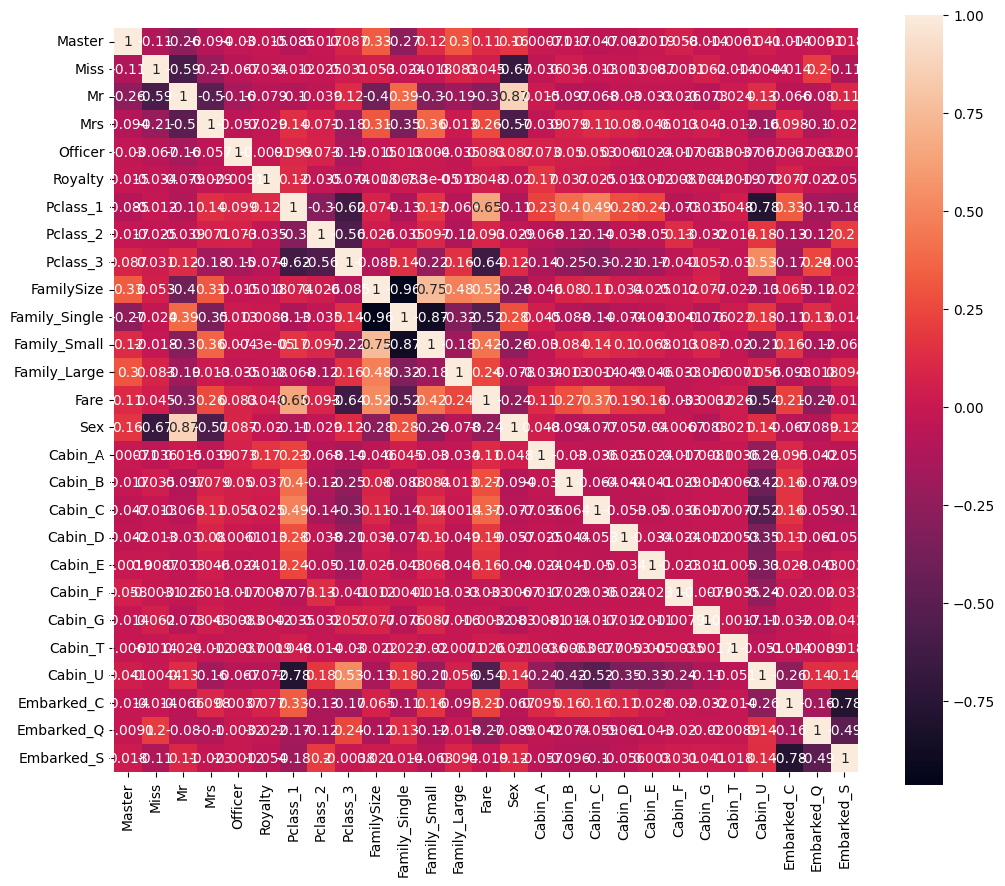

In [117]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.subplots(figsize = (12,10))
sns.heatmap(full_X.corr(method='spearman'),annot=True,square=True)

构建模型

In [118]:
full_without_survived = full.drop('Survived',axis=1)

In [119]:
X = full_without_survived.iloc[0:890,:]
y = full['Survived'].iloc[0:890]
# X = full_without_survived
# y = full['Survived']

In [120]:
print(X.shape)
print(y.shape)

(890, 29)
(890,)


In [121]:
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X,y,train_size = 0.8,random_state=5)

In [122]:
#逻辑回归
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit( train_X , train_y )
print('逻辑回归的预测正确率',model.score(train_X,train_y))

#随机森林Random Forests Model
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
model.fit( train_X , train_y )
print('随机森林的预测正确率',model.score(train_X,train_y))

#支持向量机Support Vector Machines
from sklearn.svm import SVC
model = SVC()
model.fit( train_X , train_y )
print('支持向量机的预测正确率',model.score(train_X,train_y))

#梯度提升决策分类Gradient Boosting Classifier
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit( train_X , train_y )
print('梯度提升决策的预测正确率',model.score(train_X,train_y))

#KNN最邻近算法 K-nearest neighbors
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors = 3)
model.fit( train_X , train_y )
print('K近邻的预测正确率',model.score(train_X,train_y))

#朴素贝叶斯分类 Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit( train_X , train_y )
print('朴素贝叶斯的预测正确率',model.score(train_X,train_y))
# 分类问题，score得到的是模型的正确率
#print(model.score(test_X , test_y ))


逻辑回归的预测正确率 0.8314606741573034


c:\python\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


随机森林的预测正确率 1.0
支持向量机的预测正确率 0.6629213483146067
梯度提升决策的预测正确率 0.9073033707865169
K近邻的预测正确率 0.8103932584269663
朴素贝叶斯的预测正确率 0.797752808988764


In [123]:
#使用XGBoost
model = GradientBoostingClassifier()
model.fit( train_X , train_y )

GradientBoostingClassifier()

In [124]:
y_predict = model.predict(full_without_survived.iloc[891:,:])
y_predict = y_predict.astype(int)

In [126]:
passenger_id = full['PassengerId'].iloc[891:,]
preDf = pd.DataFrame({
    'passenger_id':passenger_id,
    'Survived':y_predict
})

In [128]:
print(preDf.shape)
preDf.head(10)

(418, 2)


,passenger_id,Survived
891,892,0
892,893,1
893,894,0
894,895,0
895,896,1
896,897,0
897,898,1
898,899,0
899,900,1
900,901,0


In [ ]:
preDf.to_csv('titanic_pred.csv',index=False)
#index=False：这个参数表示在保存文件时不保存数据框的行索引。如果不设置这个参数，默认情况下行索引会被保存到 CSV 文件中